<a href="https://colab.research.google.com/github/snghynn/stat_programming/blob/main/stat_programming_5_Pytorch_multinomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2.3.4 Revisiting Iris data

We use `train_loader` to train the model, and use `test_loader` to calculate the test accuracy. Use the following code to train the model, and calculate the test accuracy. In this case, you need to define your own loss function to calculate cross-entropy function from `q_hat` and `tt`.
```
z_model = nn.Linear(784, 10, bias=True)
```
and
```
for xx, tt in train_loader:
  zhat = z_model(xx)
  q_hat = torch.softmax()
```

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, TensorDataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Download and load the test data
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 113848042.49it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 116476628.68it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26219997.41it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21477484.52it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
iris = load_iris()

X = torch.tensor(iris.data, dtype=torch.float32)
y = torch.tensor(iris.target, dtype=torch.long)
t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
t = torch.tensor(t, dtype=torch.float32)

<ipython-input-27-ccb42b473c42>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.nn.functional.one_hot(torch.tensor(y, dtype=torch.int64), num_classes=3)
<ipython-input-27-ccb42b473c42>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, dtype=torch.float32)


In [ ]:
# Normalize the data
X = (X-torch.mean(X,dim=0))/torch.std(X, dim=0)

# Split the dataset
X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.2, random_state=42)

# create Pytorch Datasets
train_dataset = TensorDataset(X_train, t_train)
val_dataset = TensorDataset(X_val, t_val)

In [ ]:
# Define the dataloaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(val_dataset, batch_size=16, shuffle=True)

In [ ]:
# modeling

def myloss(q_hat, tt):
  loss = -torch.mean(torch.sum(tt*torch.log(qhat), axis=1))
  return loss

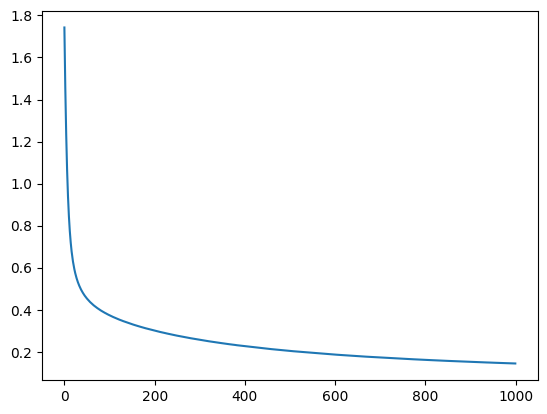

In [ ]:
# linear model
input_size = 4
num_classes = 3
z_model = nn.Linear(input_size,num_classes, bias=True)

# optimizer
optimizer = optim.SGD(z_model.parameters(), lr=0.01)

epochs = 1000
history = []
for epoch in range(epochs):
    LOSS = 0
    for xx, tt in train_loader:
        # Forward pass
        zhat = z_model(xx)
        q_hat = torch.softmax(zhat, dim=1)
        # Compute the loss by using 'myloss' function
        loss = myloss(q_hat, tt)
        LOSS = LOSS+loss.item()*len(xx)
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    history.append(LOSS/X_train.shape[0])

plt.plot(history)

In [ ]:
def myaccuracy(qhat, t):
  yhat = torch.argmax(qhat, axis=1).to(torch.float32)
  y = torch.argmax(t, axis=1).to(torch.float32)
  accuracy = torch.sum((y==yhat).to(torch.float32))
  return accuracy

In [ ]:
accuracy_sum = 0

for xx, tt in test_loader:
  zhat = z_model(xx)
  qhat = torch.softmax(zhat, dim=1)
  accuracy_sum += myaccuracy(qhat, tt).item()

print(accuracy_sum/len(X_val))

1.0


> accuracy가 1에 수렴하는 결과를 보인다.

## Exercise 2.3.5: Fashion MNIST data (HW)

You are given the following fashion MNIST data. Do the multinomial regression so that the regression machine can determine the label from the images. Calculate the test accuracy. In the test dataset, identify at least 5 cases where your predictions are wrong, and explain why possibly they were mis-classified.

1. the picture

2. predicted label

3. real label

4. Explain the possible reason why your model is wrong in this case.

Hint: Each training and test example is assigned to one of the following labels:

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('./data', download=True, train=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
validationset = datasets.FashionMNIST('./data', download=True, train=False, transform=transform)
test_loader = DataLoader(validationset, batch_size=64, shuffle=True)

In [ ]:
xx, yy = trainset[0]

Ankle boot


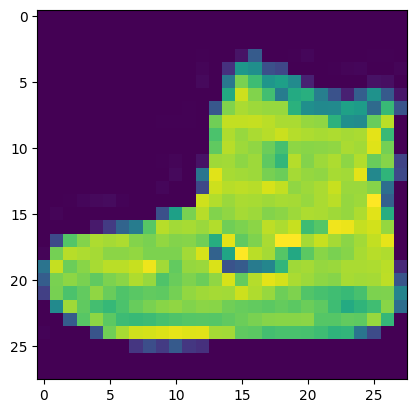

In [ ]:
plt.imshow(xx.reshape(28,28))
my_name = { 0: "T-shirt/top", 1: "Trouser",
              2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}
print(my_name[yy])

In [ ]:
def myloss(q_hat, tt):
  loss = -torch.mean(torch.sum(tt*torch.log(qhat), axis=1))
  return loss

# linear model
input_size = 28*28
num_classes = 10
z_model = nn.Linear(input_size,num_classes, bias=True)   # 4:parameter, 3:classes
# optimizer
optimizer = optim.SGD(z_model.parameters(), lr=0.01)

<ipython-input-62-c30abde60d75>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tt = torch.nn.functional.one_hot(torch.tensor(tt, dtype=torch.int64), num_classes=10)
<ipython-input-62-c30abde60d75>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tt = torch.tensor(tt, dtype=torch.float32)


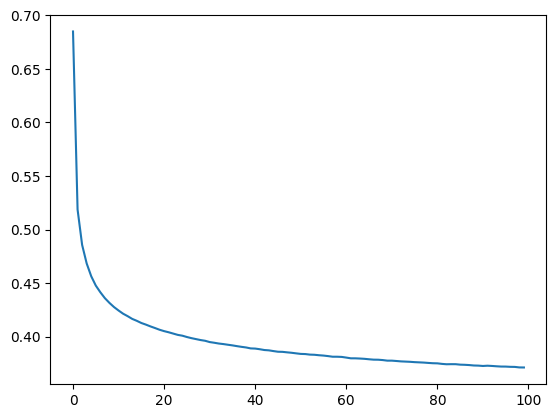

In [ ]:
n = 60000
epochs = 100
history = []


for epoch in range(epochs):
    LOSS = 0
    for xx, tt in train_loader:
        # Forward pass
        zhat = z_model(xx.reshape([-1, input_size]))
        qhat = torch.softmax(zhat, dim=1)
        tt = torch.nn.functional.one_hot(torch.tensor(tt, dtype=torch.int64), num_classes=10)
        tt = torch.tensor(tt, dtype=torch.float32)
        # Compute the loss by using 'myloss' function
        loss = myloss(qhat, tt)
        LOSS = LOSS+loss.item()*len(xx)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    history.append(LOSS/n)

plt.plot(history)

In [ ]:
# Function to evaluate the model on the test set
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    return accuracy

In [ ]:
# Evaluate the model on the test set
test_accuracy = evaluate_model(z_model, test_loader)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.8436


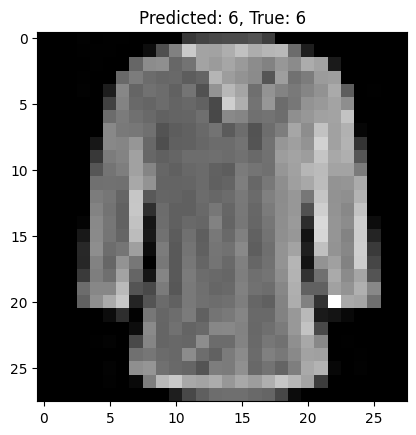

** Case 1 **
Predicted Label: 6, True Label: 2




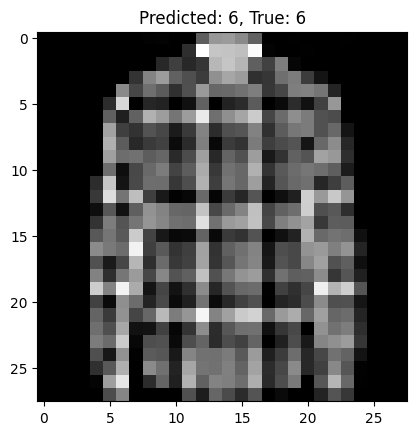

** Case 2 **
Predicted Label: 4, True Label: 2




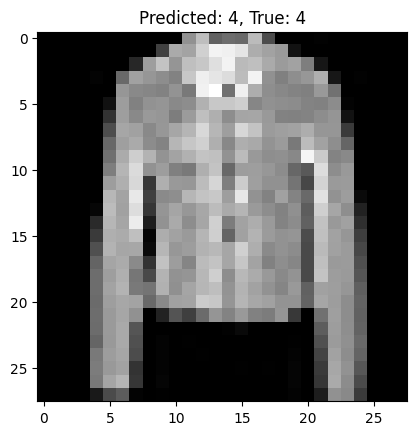

** Case 3 **
Predicted Label: 4, True Label: 2




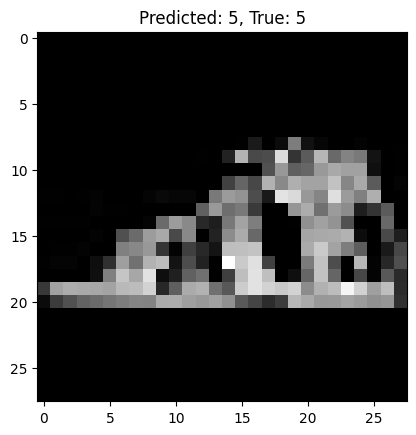

** Case 4 **
Predicted Label: 6, True Label: 8




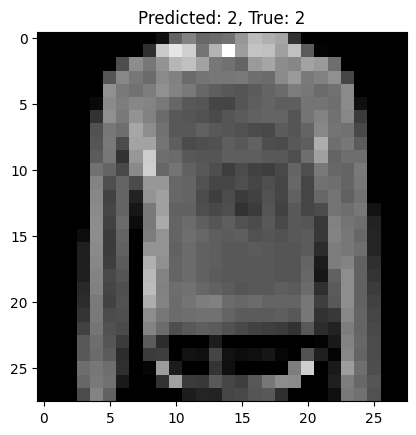

** Case 5 **
Predicted Label: 6, True Label: 2




In [ ]:
# Function to identify misclassified cases and provide explanations
def identify_misclassified(model, test_loader, num_cases=5):
    model.eval()
    misclassified_indices = []
    predicted_labels = []
    true_labels = []

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            misclassified_mask = (predicted != labels)
            misclassified_indices.extend(np.where(misclassified_mask)[0])
            predicted_labels.extend(predicted[misclassified_mask].tolist())
            true_labels.extend(labels[misclassified_mask].tolist())

            if len(misclassified_indices) >= num_cases:
                break

    return misclassified_indices[:num_cases], predicted_labels[:num_cases], true_labels[:num_cases]

# Identify misclassified cases and provide explanations
misclassified_indices, predicted_labels, true_labels = identify_misclassified(z_model, test_loader, num_cases=5)

# Visualize misclassified cases and explanations
for i, index in enumerate(misclassified_indices):
    xx, yy = validationset[index]
    flattened_image = xx.view(1, -1)
    output = z_model(flattened_image)
    _, predicted_label = torch.max(output, 1)

    # Visualize the misclassified image
    plt.imshow(xx.squeeze(), cmap='gray')
    plt.title(f"Predicted: {predicted_label.item()}, True: {yy}")
    plt.show()

    # Print explanations
    print(f"** Case {i + 1} **")
    print(f"Predicted Label: {predicted_labels[i]}, True Label: {true_labels[i]}")
    print("\n")

- case1: shirt와 pullover은 닮은 모양을 가진다
- case2: pullover와 coat는 닮은 모양이다
- case3: pullover와 coat는 닮은 모양이다
- case4: 이미지가 선명하지 않다
- case5: shirt와 pullover은 닮은 모양을 가진다